# Clustering 

In this lab we use k-menas clustering to cluster universities (College_Data.csv) into to two groups.

## The Data

The data has 777 observations on the following 18 variables.
* Private A factor with levels No and Yes indicating private or public university
* Apps Number of applications received
* Accept Number of applications accepted
* Enroll Number of new students enrolled
* Top10perc Pct. new students from top 10% of H.S. class
* Top25perc Pct. new students from top 25% of H.S. class
* F.Undergrad Number of fulltime undergraduates
* P.Undergrad Number of parttime undergraduates
* Outstate Out-of-state tuition
* Room.Board Room and board costs
* Books Estimated book costs
* Personal Estimated personal spending
* PhD Pct. of faculty with Ph.D.’s
* Terminal Pct. of faculty with terminal degree
* S.F.Ratio Student/faculty ratio
* perc.alumni Pct. alumni who donate
* Expend Instructional expenditure per student
* Grad.Rate Graduation rate

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans 
from sklearn.mixture import GaussianMixture
%matplotlib inline


## Read in the data

In [2]:
data = pd.read_csv('College_Data.csv')

In [3]:
data.head() 

,School,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Abilene Christian University,1,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Adelphi University,1,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Adrian College,1,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Agnes Scott College,1,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Alaska Pacific University,1,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


In [4]:
data.shape

(777, 19)

In [5]:
data.describe()

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
count,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.00000
mean,0.727156,3001.638353,2018.804376,779.972973,27.558559,55.796654,3699.907336,855.298584,10440.669241,4357.526384,549.380952,1340.642214,72.660232,79.702703,14.089704,22.743887,9660.171171,65.46332
std,0.445708,3870.201484,2451.113971,929.176190,17.640364,19.804778,4850.420531,1522.431887,4023.016484,1096.696416,165.105360,677.071454,16.328155,14.722359,3.958349,12.391801,5221.768440,17.17771
min,0.000000,81.000000,72.000000,35.000000,1.000000,9.000000,139.000000,1.000000,2340.000000,1780.000000,96.000000,250.000000,8.000000,24.000000,2.500000,0.000000,3186.000000,10.00000
25%,0.000000,776.000000,604.000000,242.000000,15.000000,41.000000,992.000000,95.000000,7320.000000,3597.000000,470.000000,850.000000,62.000000,71.000000,11.500000,13.000000,6751.000000,53.00000
50%,1.000000,1558.000000,1110.000000,434.000000,23.000000,54.000000,1707.000000,353.000000,9990.000000,4200.000000,500.000000,1200.000000,75.000000,82.000000,13.600000,21.000000,8377.000000,65.00000
75%,1.000000,3624.000000,2424.000000,902.000000,35.000000,69.000000,4005.000000,967.000000,12925.000000,5050.000000,600.000000,1700.000000,85.000000,92.000000,16.500000,31.000000,10830.000000,78.00000
max,1.000000,48094.000000,26330.000000,6392.000000,96.000000,100.000000,31643.000000,21836.000000,21700.000000,8124.000000,2340.000000,6800.000000,103.000000,100.000000,39.800000,64.000000,56233.000000,118.00000


## K Means Clustering

In [6]:
kmeans = KMeans(n_clusters=3, random_state=100, max_iter=100) 


In [7]:
X = data.drop(columns=['School', 'Private', 'S.F.Ratio', 'Grad.Rate'])

print(X)

kmeans.fit(X) 


      Apps  Accept  Enroll  Top10perc  Top25perc  F.Undergrad  P.Undergrad  \
0     1660    1232     721         23         52         2885          537   
1     2186    1924     512         16         29         2683         1227   
2     1428    1097     336         22         50         1036           99   
3      417     349     137         60         89          510           63   
4      193     146      55         16         44          249          869   
..     ...     ...     ...        ...        ...          ...          ...   
772   2197    1515     543          4         26         3089         2029   
773   1959    1805     695         24         47         2849         1107   
774   2097    1915     695         34         61         2793          166   
775  10705    2453    1317         95         99         5217           83   
776   2989    1855     691         28         63         2988         1726   

     Outstate  Room.Board  Books  Personal  PhD  Terminal  perc

C:\Users\andyc\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(max_iter=100, n_clusters=3, random_state=100)

In [8]:
print(kmeans.cluster_centers_)

pd.DataFrame(kmeans.cluster_centers_, columns = X.columns)


[[1.70182301e+03 1.23653451e+03 4.91520354e+02 2.18194690e+01
  4.97769912e+01 2.22618053e+03 6.56030088e+02 9.28193982e+03
  4.14370619e+03 5.37015929e+02 1.32979646e+03 6.75787611e+01
  7.51433628e+01 2.09274336e+01 7.83074690e+03]
 [3.79185271e+03 2.04663566e+03 6.53937984e+02 4.98372093e+01
  7.72248062e+01 2.57355039e+03 2.35829457e+02 1.69343256e+04
  5.43727907e+03 5.74604651e+02 1.03575194e+03 8.75193798e+01
  9.33333333e+01 3.51627907e+01 1.78138140e+04]
 [1.06216145e+04 7.30063855e+03 2.93942169e+03 3.20000000e+01
  6.34698795e+01 1.54825060e+04 3.17455422e+03 8.23585542e+03
  4.13487952e+03 5.94349398e+02 1.88833735e+03 8.41566265e+01
  8.95542169e+01 1.58072289e+01 9.44095181e+03]]


,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,perc.alumni,Expend
0,1701.823009,1236.534513,491.520354,21.819469,49.776991,2226.180531,656.030088,9281.939823,4143.706195,537.015929,1329.796460,67.578761,75.143363,20.927434,7830.746903
1,3791.852713,2046.635659,653.937984,49.837209,77.224806,2573.550388,235.829457,16934.325581,5437.279070,574.604651,1035.751938,87.519380,93.333333,35.162791,17813.813953
2,10621.614458,7300.638554,2939.421687,32.000000,63.469880,15482.506024,3174.554217,8235.855422,4134.879518,594.349398,1888.337349,84.156627,89.554217,15.807229,9440.951807


In [9]:
print(kmeans.labels_)

pd.DataFrame(kmeans.labels_).value_counts()


[0 0 0 1 0 0 0 0 1 0 1 1 0 0 0 0 1 0 0 0 1 2 0 2 0 0 0 2 0 0 0 0 0 0 0 0 1
 1 0 2 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 2 1 2 1 0 1 0 0 0 0 2 1 1 1 0
 0 0 0 0 2 2 0 0 0 0 0 0 1 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0
 0 0 0 1 1 0 1 2 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 2 0 0 1 0 0 0
 0 1 0 0 1 0 0 0 0 0 1 1 0 0 1 0 1 0 0 0 0 0 0 0 1 0 1 1 2 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 1 0 0 0 0 2 1 0 1
 2 0 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 1 1 1 0 0 0 0 1 0 1
 0 0 0 0 0 0 0 0 0 1 2 0 0 0 0 2 0 0 2 0 2 0 0 0 0 1 0 0 1 2 0 0 0 1 0 0 0
 1 0 0 1 0 1 0 0 0 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 2 2 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 1 0 0 0 0 2 0 0 0 0 0 2 2 2 0 0 0 1 0 0 0 1 1 0 0 2 1 0 0 2 0 0 0 0 0 0 0
 0 2 1 0 0 0 0 0 0 1 0 0 1 0 0 1 0 2 0 0 0 0 0 0 1 1 0 1 1 0 1 0 0 0 0 0 1
 0 0 2 0 0 0 0 0 2 0 0 0 

0    565
1    129
2     83
dtype: int64

In [10]:
data['cluster'] = kmeans.labels_
data

,School,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate,cluster
0,Abilene Christian University,1,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60,0
1,Adelphi University,1,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56,0
2,Adrian College,1,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54,0
3,Agnes Scott College,1,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59,1
4,Alaska Pacific University,1,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
772,Worcester State College,0,2197,1515,543,4,26,3089,2029,6797,3900,500,1200,60,60,21.0,14,4469,40,0
773,Xavier University,1,1959,1805,695,24,47,2849,1107,11520,4960,600,1250,73,75,13.3,31,9189,83,0
774,Xavier University of Louisiana,1,2097,1915,695,34,61,2793,166,6900,4200,617,781,67,75,14.4,20,8323,49,0
775,Yale University,1,10705,2453,1317,95,99,5217,83,19840,6510,630,2115,96,96,5.8,49,40386,99,1


C:\Users\andyc\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\andyc\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\andyc\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\andyc\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of

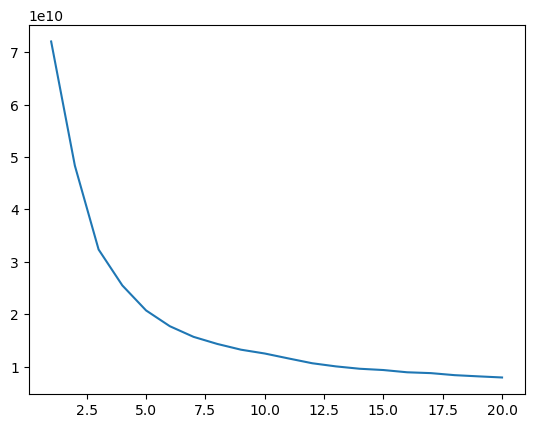

In [11]:
max_K = 20

k = np.arange(1, max_K+1) 
errors = []

for i in range(1,max_K+1):
    kmeans = KMeans(n_clusters=i) 
    kmeans.fit(data.drop(['School', 'Private'],axis=1)) 
    errors.append(kmeans.inertia_)
    
results = pd.DataFrame({'k': k, 'errors': errors})

plt.plot('k', 'errors', data=results)
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster Sum of Errors')


# GMM (Gaussian Mixture Models)

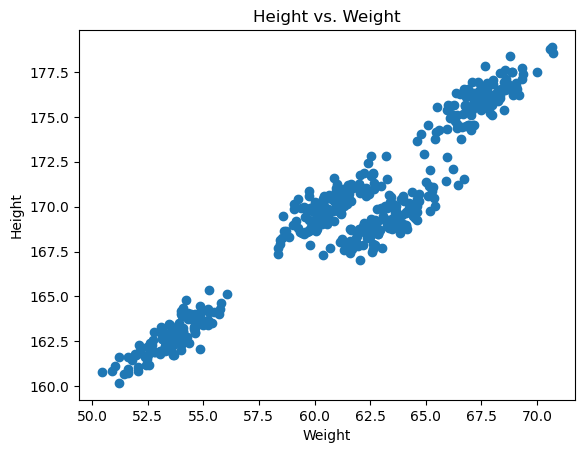

In [12]:
data = pd.read_csv('body_measures.csv') 

plt.scatter(data.Weight, data.Height)
plt.xlabel('Weight')
plt.ylabel('Height')
plt.title('Height vs. Weight')
plt.show()


C:\Users\andyc\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\andyc\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


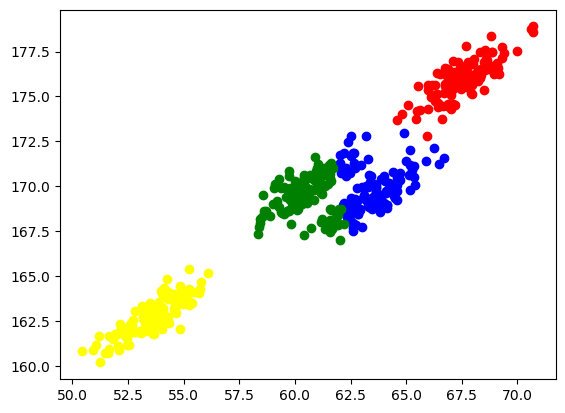

In [13]:

data = pd.read_csv('body_measures.csv')

kmeans = KMeans(n_clusters = 4, random_state = 100)
kmeans.fit(data)

clusters = pd.DataFrame(data)
clusters['cluster'] = kmeans.predict(data) 
clusters.columns = ['Weight', 'Height', 'cluster']

colors = ['red', 'yellow', 'blue', 'green']

for k in range(0, 4):
    data = clusters[clusters['cluster'] == k]
    plt.scatter(data.Weight, data.Height, c = colors[k])
    
plt.show()


C:\Users\andyc\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


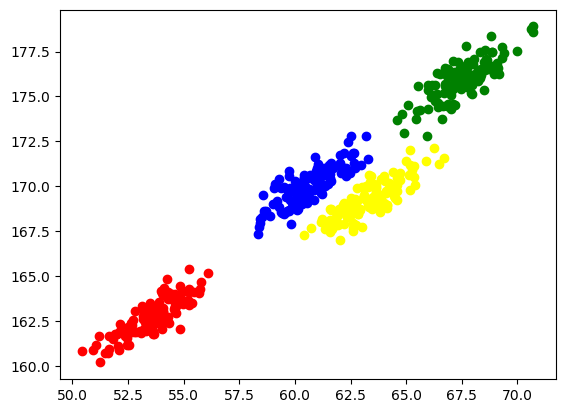

In [14]:
# Cluster by GMM

data = pd.read_csv('body_measures.csv')

gmm = GaussianMixture(n_components = 4, random_state = 100)

gmm.fit(data) 

clusters = pd.DataFrame(data)
clusters['cluster'] = gmm.predict(data)
clusters.columns = ['Weight', 'Height', 'cluster']

colors = ['red', 'yellow', 'blue', 'green']

for k in range(0, 4):
    data = clusters[clusters['cluster'] == k]
    plt.scatter(data.Weight, data.Height, c = colors[k])
    
plt.show()


C:\Users\andyc\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


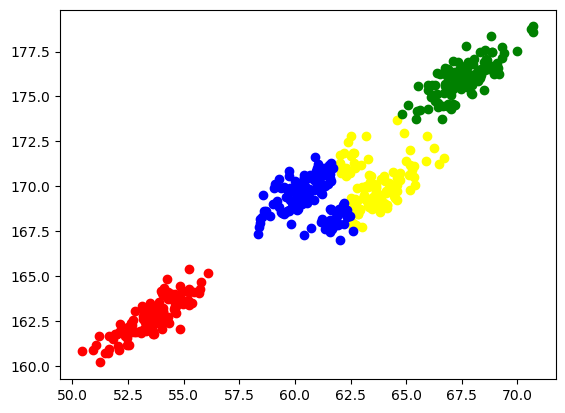

In [15]:
# Cluster by GMM

data = pd.read_csv('body_measures.csv')

gmm = GaussianMixture(covariance_type = 'spherical', n_components = 4, random_state = 100)

gmm.fit(data) 

clusters = pd.DataFrame(data)
clusters['cluster'] = gmm.predict(data)
clusters.columns = ['Weight', 'Height', 'cluster']

colors = ['red', 'yellow', 'blue', 'green']

for k in range(0, 4):
    data = clusters[clusters['cluster'] == k]
    plt.scatter(data.Weight, data.Height, c = colors[k])
    
plt.show()
